# Explainable CNN

# Installing the package

In [1]:
! pip install explainable-cnn

# Import and Usage

In [2]:
from explainable_cnn import CNNExplainer
import pickle, torch
from torchvision import models
import matplotlib.pyplot as plt

from PIL import Image

In [4]:
with open('../chapter_3/Chapter_3/data/imagenet_class_labels.pkl', 'rb') as label_file:
    imagenet_clas_labels = pickle.load(label_file)
imagenet_clas_labels

{0: 'tench, Tinca tinca',
 1: 'goldfish, Carassius auratus',
 2: 'great white shark, white shark, man-eater, man-eating shark, Carcharodon carcharias',
 3: 'tiger shark, Galeocerdo cuvieri',
 4: 'hammerhead, hammerhead shark',
 5: 'electric ray, crampfish, numbfish, torpedo',
 6: 'stingray',
 7: 'cock',
 8: 'hen',
 9: 'ostrich, Struthio camelus',
 10: 'brambling, Fringilla montifringilla',
 11: 'goldfinch, Carduelis carduelis',
 12: 'house finch, linnet, Carpodacus mexicanus',
 13: 'junco, snowbird',
 14: 'indigo bunting, indigo finch, indigo bird, Passerina cyanea',
 15: 'robin, American robin, Turdus migratorius',
 16: 'bulbul',
 17: 'jay',
 18: 'magpie',
 19: 'chickadee',
 20: 'water ouzel, dipper',
 21: 'kite',
 22: 'bald eagle, American eagle, Haliaeetus leucocephalus',
 23: 'vulture',
 24: 'great grey owl, great gray owl, Strix nebulosa',
 25: 'European fire salamander, Salamandra salamandra',
 26: 'common newt, Triturus vulgaris',
 27: 'eft',
 28: 'spotted salamander, Ambystoma 

In [10]:
model = models.vgg16(pretrained=True)

c:\Users\user\anaconda3\envs\pytorch\lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and will be removed in 0.15, please use 'weights' instead.
  warnings.warn(
c:\Users\user\anaconda3\envs\pytorch\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=VGG16_Weights.IMAGENET1K_V1`. You can also use `weights=VGG16_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [11]:
x_cnn = CNNExplainer(model, imagenet_clas_labels)

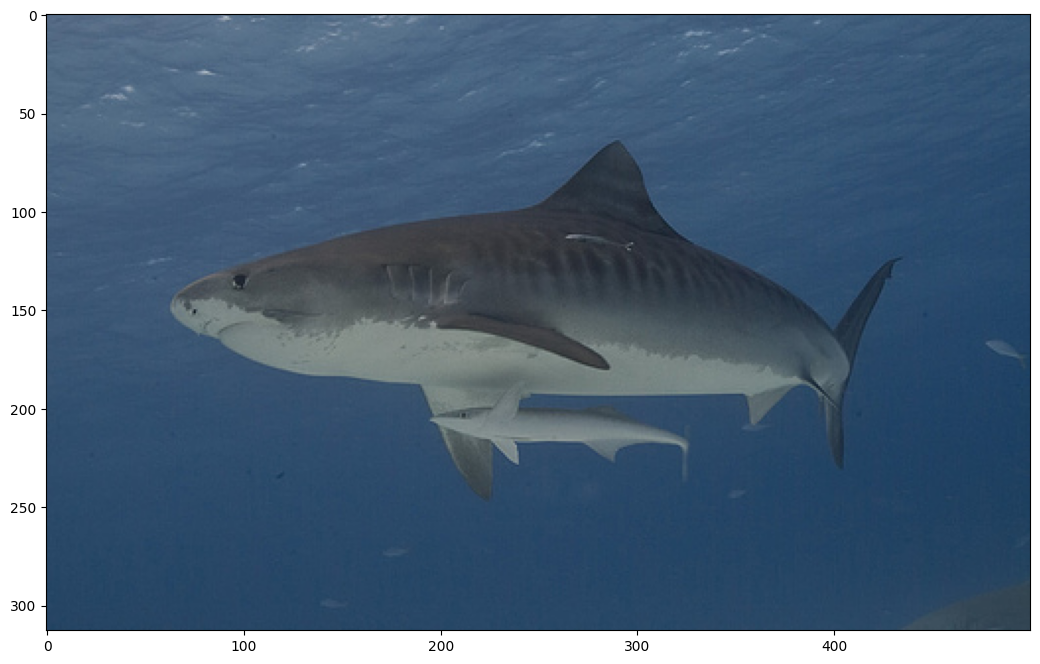

tiger shark, Galeocerdo cuvieri
500 313


In [9]:
## Load a smaple image

image = Image.open('../chapter_3/Chapter_3/data/tiger_shark.jpeg').convert('RGB')

plt.figure(figsize=(15,8))
plt.imshow(image)
plt.show()

print(imagenet_clas_labels[3])

w,h = image.size
print(w,h)

# Saliency Maps
Saliency Maps will create heatmap which denotes the area of image whrere human eye focuses first. Note that the package supports generating saliency map for a model and not layer-wise. You can 'get_saliency_map' function to get the numpy drawable numpy array. To see full list of arguments and their usage, please refer to the docstring.

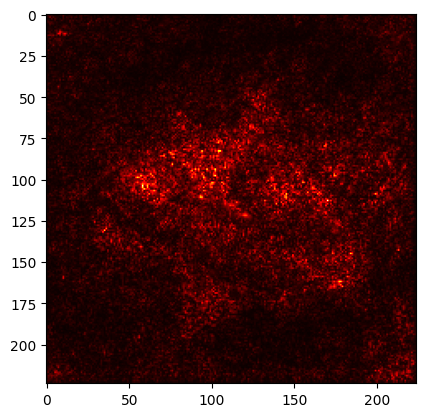

In [12]:
saliency_map = x_cnn.get_saliency_map(
    "../chapter_3/Chapter_3/data/tiger_shark.jpeg",
    3, # Label corresponding to Shark. You can pass either 3 or "tiger shark, Galeocerdo cuvieri"
    (224, 224)
)

plt.imshow(saliency_map, cmap='hot')

# Guided Backpropagation

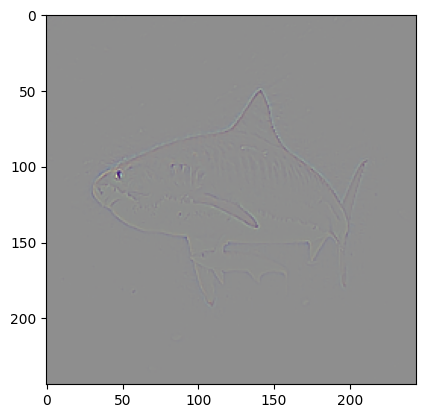

In [14]:
guided_backprop = x_cnn.get_guided_back_propagation(
    "../chapter_3/Chapter_3/data/tiger_shark.jpeg",
    3,
    (244, 244)
)

plt.imshow(guided_backprop.astype('uint8'))

# Grad CAM

c:\Users\user\anaconda3\envs\pytorch\lib\site-packages\torch\nn\modules\module.py:1053: UserWarning: Using a non-full backward hook when the forward contains multiple autograd Nodes is deprecated and will be removed in future versions. This hook will be missing some grad_input. Please use register_full_backward_hook to get the documented behavior.
  warnings.warn("Using a non-full backward hook when the forward contains multiple autograd Nodes "


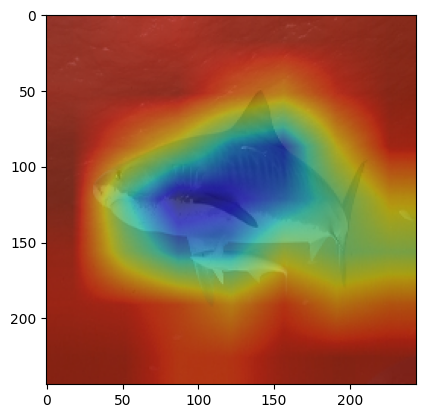

In [15]:
grad_cam = x_cnn.get_grad_cam(
    "../chapter_3/Chapter_3/data/tiger_shark.jpeg",
    3,
    (244, 244),
    ["features"] # List of layer names for which you want to generate image.
)

# Note that get_grad_cam() returns list of images (numpy array)
plt.imshow(grad_cam[0].astype('uint8'))